<a href="https://colab.research.google.com/github/winengewe/tsunami_predict/blob/main/20251120_Earthquake_%26_Tsunami.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1

In [ ]:
# 1. import libraries
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# read in all the add on modules to allow for data manipulation and visualisation

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# 2.Load and view the data
df=pd.read_csv("gdrive/My Drive/GC NPA AI 2025/earthquake_data_tsunami.csv")
print('Data Info')
print(df.info())
print('\nData Head (First5rows)')
print(df.head())
print('\nData Tail (Last5rows)')
print(df.tail())
print('\nData Describe')
print(df.describe())

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   770 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       774 non-null    float64
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(7), int64(6)
memory usage: 79.6 KB
None

Data Head (First5rows)
   magnitude  cdi  mmi  sig  nst   dmin   gap    depth  latitude  longitude  \
0        7.0    8    7  768  117  0.509  17.0   14.000   -9.7963    159.596   
1        6.9    4    4  735   99  2.229  34.0  

In [ ]:
# 3.Check the file and Clean if needed
print("\nMissing values:\n", df.isnull().sum()) # Show the total of missing values for each column
df = df.dropna() # Drop rows with missing values
print("\nAfter dropping rows:\n", df.isnull().sum())


Missing values:
 magnitude     0
cdi           0
mmi           0
sig           0
nst           0
dmin          0
gap           0
depth         0
latitude     12
longitude     0
Year          8
Month         0
tsunami       0
dtype: int64

After dropping rows:
 magnitude    0
cdi          0
mmi          0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
Year         0
Month        0
tsunami      0
dtype: int64


In [ ]:
# 4.Check for correlations
df.corr(numeric_only=True)

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
magnitude,1.000000,0.209122,0.279921,0.514759,0.105708,-0.090927,-0.097812,0.036684,-0.006216,-0.026351,-0.044218,-0.027005,0.000732
cdi,0.209122,1.000000,0.303172,0.480226,-0.178549,0.008491,0.142490,-0.084063,0.135118,-0.160838,0.439322,0.005161,0.171550
mmi,0.279921,0.303172,1.000000,0.437934,0.153603,-0.294222,0.031377,-0.495092,0.149566,-0.023531,-0.200386,-0.047748,-0.134072
sig,0.514759,0.480226,0.437934,1.000000,-0.033370,-0.099403,0.141999,-0.083154,0.204161,-0.209813,0.130535,-0.036637,-0.020852
nst,0.105708,-0.178549,0.153603,-0.033370,1.000000,-0.532031,-0.103173,-0.121523,0.151416,0.163626,-0.690753,-0.030351,-0.602601
dmin,-0.090927,0.008491,-0.294222,-0.099403,-0.532031,1.000000,-0.010523,0.142176,-0.232551,-0.106391,0.537527,0.034255,0.404653
gap,-0.097812,0.142490,0.031377,0.141999,-0.103173,-0.010523,1.000000,-0.113020,0.036563,-0.282508,0.149301,0.025551,0.076095
depth,0.036684,-0.084063,-0.495092,-0.083154,-0.121523,0.142176,-0.113020,1.000000,-0.047768,-0.056191,0.168630,0.054753,0.040899
latitude,-0.006216,0.135118,0.149566,0.204161,0.151416,-0.232551,0.036563,-0.047768,1.000000,0.044486,-0.103007,-0.041390,-0.126213
longitude,-0.026351,-0.160838,-0.023531,-0.209813,0.163626,-0.106391,-0.282508,-0.056191,0.044486,1.000000,-0.163101,0.000808,-0.115622


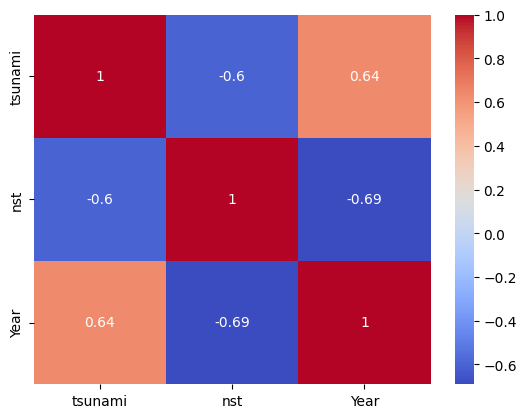

In [ ]:
# 5.Visualise the data correlations between tsunami and other appropriate data columns
sns.heatmap(df[['tsunami','nst','Year']].corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# 6.What is most correlated with tsunami?
# Year

In [ ]:
# 7.Prepare datasets for a machine learning model.
# Create a numpy array called 'x' for the identified feature and one called 'y' for 'tsunami'.
x=df[['Year']].to_numpy()
y=df[['tsunami']].to_numpy()

In [ ]:
# 8.Split these x and y numpy arrays into training and testing sets. Use a 80%/20% split
split=int(0.8*len(df)) # find a 80% value so we can use to split data nto Train & Test
x_train=x[:split] # split data to create training set from start of data to 80%
y_train=y[:split] # split data to create training set from start of data to 80%
x_test=x[split:]  # split data to create test set from 80% to end of data
y_test=y[split:]  # split data to create test set from 80% to end of data

In [ ]:
# 9.Fit the LinearRegression model from SKLearn to the above training set
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
# 10.Use the LinearRegression model's score()
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))
#poor test scores showing very low and no link between x and y

0.33366442184455003
0.0


In [ ]:
# 11.Use the LinearRegression model's predict() method
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

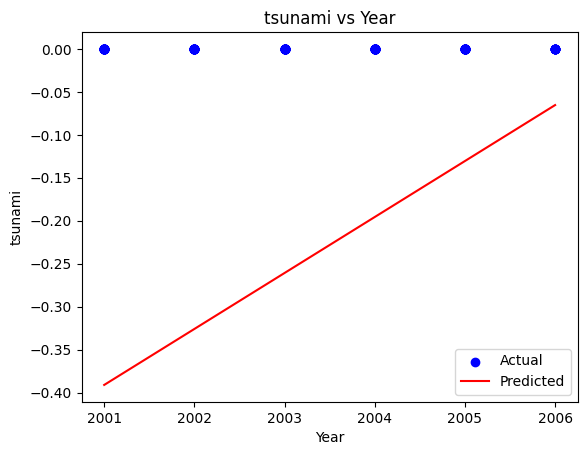

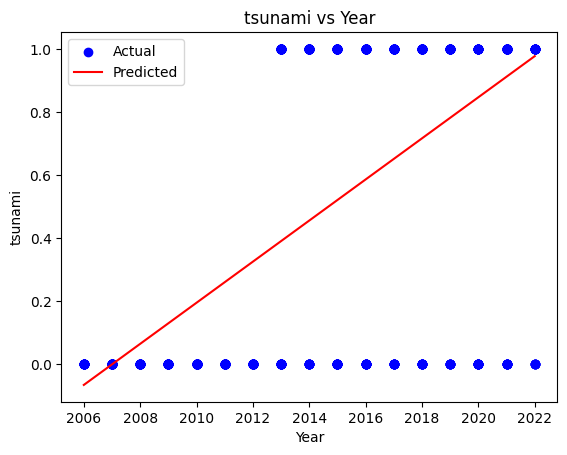

In [ ]:
# 12.Use matplotlib to visualise the performance on both the training and testing sets
plt.title("tsunami vs Year")
plt.xlabel("Year")
plt.ylabel("tsunami")
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,y_pred_test,color='red')
plt.legend(['Actual','Predicted'])
plt.show()

plt.title("tsunami vs Year")
plt.xlabel("Year")
plt.ylabel("tsunami")
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train,y_pred_train,color='red')
plt.legend(['Actual','Predicted'])
plt.show()

# Part 2

In [ ]:
# 1.Create a numpy multi-dimensional array called 'x' for the all the features in the dataset
# and again one called 'y' for 'tsunami'.
x = df.drop(columns=['tsunami']).to_numpy() # set the x values as all except tsunami
y=df[['tsunami']].to_numpy()

In [ ]:
# 2.Split these x and y numpy arrays into training and testing sets. Use a 80%/20% split again.
split=int(0.8*len(df)) # find a 80% value so we can use to split data nto Train & Test
x_train=x[:split] # split data to create training set from start of data to 80%
y_train=y[:split] # split data to create training set from start of data to 80%
x_test=x[split:]  # split data to create test set from 80% to end of data
y_test=y[split:]  # split data to create test set from 80% to end of data

In [ ]:
# 3.Fit the RandomForestRegressor model from SKLearn to the above training set
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [ ]:
# 4.Use the RandomForestRegressor model's score() method
print("Train model score: ",model.score(x_train,y_train))
print("Test model score: ",model.score(x_test,y_test))

Train model score:  0.9582390774125132
Test model score:  1.0


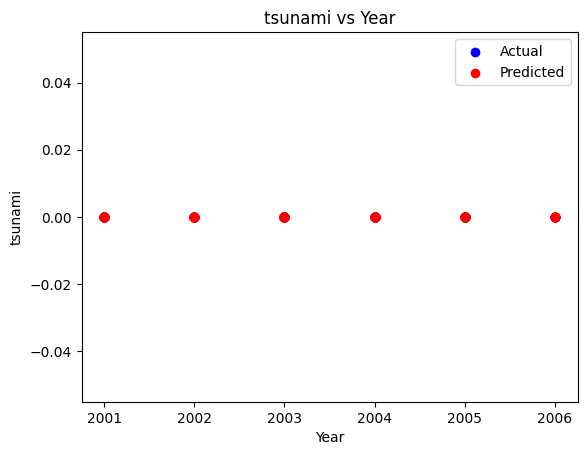

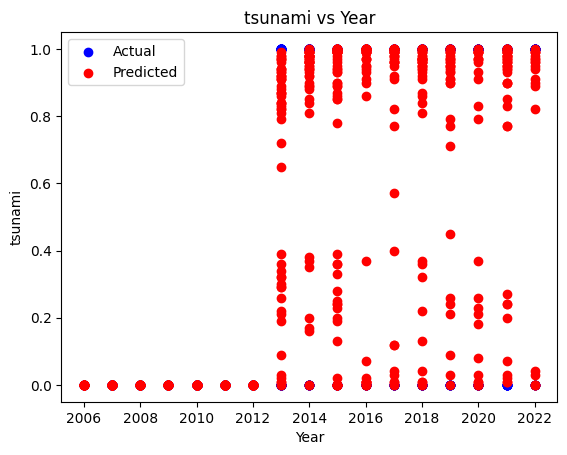

In [ ]:
# 5.Use the RandomForestRegressor model's predict() method
# and matplotlib to visualise the performance on both the training and testing sets
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)

plt.scatter(x_test[:,10],y_test,color='blue')
plt.scatter(x_test[:,10],y_pred_test,color='red')
plt.title("tsunami vs Year")
plt.xlabel("Year")
plt.ylabel("tsunami")
plt.legend(['Actual','Predicted'])
plt.show()

plt.scatter(x_train[:,10],y_train,color='blue')
plt.scatter(x_train[:,10],y_pred_train,color='red')
plt.title("tsunami vs Year")
plt.xlabel("Year")
plt.ylabel("tsunami")
plt.legend(['Actual','Predicted'])
plt.show()


# Part 3

Explain the results from the Linear Regression and Random Forest models.

**Which had the best the performance on the training set?**

Ans:Random Forest Regression model

**Which had the best performance on the test set?**

Ans:Random Forest Regression model

**Which model would you use for making 'tsunami' predictions?**

Ans:Random Forest Regression model

**Why that model ?**

**The best prediction on Test & Train is the Random Forest as the Linear regression values do not match at all & scoring is very poor.**

**Would recommend the Random Forest model as score & visualisation are very good**